In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df =pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

In [23]:
print(df)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


In [24]:
x = df[[0,1,2,3,4,5,6,7]].values
y = df[8].values

In [25]:
class diabetes:
    def __init__(self,l2_lambda=0.1,epochs=2000,ir=0.01):
        self.epochs = epochs
        self.ir = ir
        self.weight = None
        self.bias = None
        self.losses = []
        self.l2_lambda = l2_lambda
    def fit(self,x,y):
        n_samples,n_features = x.shape
        np.random.seed(42)
        self.weight = np.random.randn(n_features)
        self.bias = np.random.randn()
        x =(x-x.mean())/ x.std()
        for i in range(2000):
            linear_model_output = np.dot(x, self.weight) + self.bias
            y_predicted = self._sigmoid(linear_model_output)
            error = y_predicted - y

            gradient_weight = (1/n_samples)*np.dot(x.T, error)
            gradient_bias = (1/n_samples)*np.sum(error)

            gradient_weight += 2*self.l2_lambda*self.weight

            self.weight -= self.ir * gradient_weight
            self.bias -= self.ir * gradient_bias

            loss =  -np.mean(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
            penalty = self.l2_lambda*np.sum(self.weight**2)
            loss += penalty
            self.losses.append(loss)

    def predict(self, x):
        x =(x-x.mean())/ x.std()
        linear_model_output = np.dot(X,self.weight) + self.bias
        y_predicted = self._sigmoid(linear_model_output)
        return y_predicted
    def _sigmoid(self,z):
        z = np.clip(z,-500,500)
        return 1/(1+np.exp(-z))

In [26]:
model = diabetes()
model.fit(x,y)

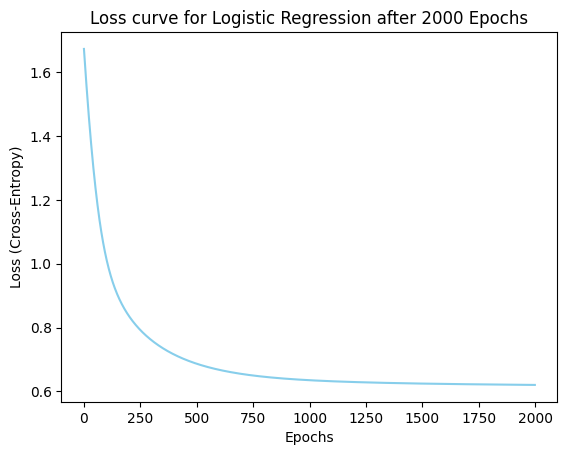

In [31]:
plt.plot(model.losses, color='skyblue')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs} Epochs")
plt.show()